In [334]:
import pandas as pd

In [335]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [337]:
#Dropping irrelevant Column
df = df.drop(['customerID'], axis=1)

In [338]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [339]:
# Encoding YES and NO
#df = df.replace("Yes",1)
#df = df.replace("No",0)

# we cant directly replace like this as some of the columns may cintain more than YES/NO options
# Moreover, some columns may be ordinal and some nominal


In [340]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [341]:
print(df['MultipleLines'].unique())
# Nominal

['No phone service' 'No' 'Yes']


In [342]:
print(df['InternetService'].unique())
# Nominal

['DSL' 'Fiber optic' 'No']


In [343]:
print(df['OnlineSecurity'].unique())
# Nominal

['No' 'Yes' 'No internet service']


In [344]:
print(df['OnlineBackup'].unique())
# Nominal

['Yes' 'No' 'No internet service']


In [345]:
print(df['DeviceProtection'].unique())
# nominal


['No' 'Yes' 'No internet service']


In [346]:
print(df['TechSupport'].unique())
# Nominal

['No' 'Yes' 'No internet service']


In [347]:
print(df['StreamingMovies'].unique())
# Nominal

['No' 'Yes' 'No internet service']


In [348]:
print(df['Contract'].unique())
# Nominal

['Month-to-month' 'One year' 'Two year']


In [351]:
print(df['PaymentMethod'].unique())
# Nominal

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# All the above Nominal Values can be encoded in a single encoding as the categories are the same.
# The Values below can be manually encoded to binary values

In [349]:
print(df['PaperlessBilling'].unique())
# Nominal

['Yes' 'No']


In [350]:
print(df['Churn'].unique())
# Nominal

['No' 'Yes']


# Encoding

In [353]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [354]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen,TotalCharges,MonthlyCharges
0,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0.001275,0.115423
1,34,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0.215867,0.385075
2,2,0,1,1,0,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0.010310,0.354229
3,45,1,0,0,1,0,1,0,0,0,...,0,0,2,0,0,0,1,0,0.210241,0.239303
4,2,0,1,1,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0.015330,0.521891


# Removing the Binary Valued Features and storing to a new data set

In [355]:
df_new = df.drop(['SeniorCitizen', 'gender','Partner','Dependents','Churn','PaymentMethod','PaperlessBilling','TotalCharges','MonthlyCharges'], axis=1)
one_hot_encoded_data = pd.get_dummies(df_new)
one_hot_encoded_data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,2,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,45,1,0,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,2,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [356]:
one_hot_encoded_data['TotalCharges'] = df['TotalCharges']
one_hot_encoded_data['MonthlyCharges'] = df['MonthlyCharges']
one_hot_encoded_data['PaperlessBilling'] = df['PaperlessBilling']
one_hot_encoded_data['PaymentMethod'] = df['PaymentMethod']
one_hot_encoded_data['Churn'] = df['Churn']
one_hot_encoded_data['Dependents'] = df['Dependents']
one_hot_encoded_data['Partner'] = df['Partner']
one_hot_encoded_data['gender'] = df['gender']
one_hot_encoded_data['SeniorCitizen'] = df['SeniorCitizen']

In [357]:
one_hot_encoded_data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.5,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [358]:
data = one_hot_encoded_data

In [359]:
#There appears to be an invalid character ''.

#[data['TotalCharges'] == True].tolist()

In [360]:
data['TotalCharges'].astype(str).astype(float)

ValueError: could not convert string to float: ''

In [361]:
#data.columns.str.strip('').astype(bool).any()]

REPLACING THE ROGUE '' and " " values which was not allowing the conversion of the data tyoe to float

In [362]:
data['TotalCharges']=data['TotalCharges'].replace(' ',)

In [363]:
df.index[df['TotalCharges'].str.contains(' ')]

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [364]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.5,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   int64  
 1   PhoneService_No                       7043 non-null   uint8  
 2   PhoneService_Yes                      7043 non-null   uint8  
 3   MultipleLines_No                      7043 non-null   uint8  
 4   MultipleLines_No phone service        7043 non-null   uint8  
 5   MultipleLines_Yes                     7043 non-null   uint8  
 6   InternetService_DSL                   7043 non-null   uint8  
 7   InternetService_Fiber optic           7043 non-null   uint8  
 8   InternetService_No                    7043 non-null   uint8  
 9   OnlineSecurity_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service    7043 non-null   uint8  
 11  OnlineSecurity_Ye

In [366]:
data['TotalCharges'].info

<bound method Series.info of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [367]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   int64  
 1   PhoneService_No                       7043 non-null   uint8  
 2   PhoneService_Yes                      7043 non-null   uint8  
 3   MultipleLines_No                      7043 non-null   uint8  
 4   MultipleLines_No phone service        7043 non-null   uint8  
 5   MultipleLines_Yes                     7043 non-null   uint8  
 6   InternetService_DSL                   7043 non-null   uint8  
 7   InternetService_Fiber optic           7043 non-null   uint8  
 8   InternetService_No                    7043 non-null   uint8  
 9   OnlineSecurity_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service    7043 non-null   uint8  
 11  OnlineSecurity_Ye

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

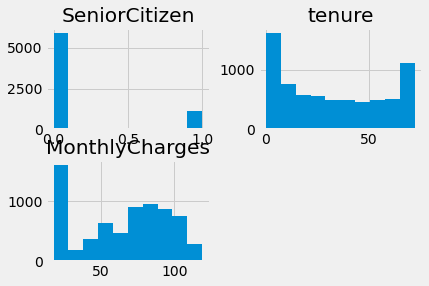

In [369]:
df.hist()

Outlier Check 

tenure                                       AxesSubplot(0.08,0.78122;0.106098x0.0987805)
PhoneService_No                          AxesSubplot(0.207317,0.78122;0.106098x0.0987805)
PhoneService_Yes                         AxesSubplot(0.334634,0.78122;0.106098x0.0987805)
MultipleLines_No                         AxesSubplot(0.461951,0.78122;0.106098x0.0987805)
MultipleLines_No phone service           AxesSubplot(0.589268,0.78122;0.106098x0.0987805)
MultipleLines_Yes                        AxesSubplot(0.716585,0.78122;0.106098x0.0987805)
InternetService_DSL                      AxesSubplot(0.843902,0.78122;0.106098x0.0987805)
InternetService_Fiber optic                 AxesSubplot(0.08,0.662683;0.106098x0.0987805)
InternetService_No                      AxesSubplot(0.207317,0.662683;0.106098x0.0987805)
OnlineSecurity_No                       AxesSubplot(0.334634,0.662683;0.106098x0.0987805)
OnlineSecurity_No internet service      AxesSubplot(0.461951,0.662683;0.106098x0.0987805)
OnlineSecu

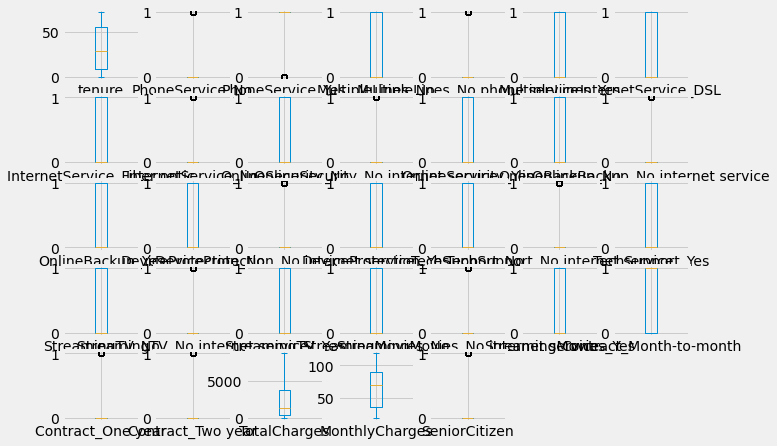

In [370]:
data.plot(kind='box',subplots=True,figsize=(10,10),layout=(7,7))

We can see that the data is not having any siginifact outliers to manage.

Scaling

In [371]:
y = data['Churn']
X = data.drop(columns=['Churn'])

In [372]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [373]:
data.replace(to_replace ="Yes",value ="1")
data.replace(to_replace ="No",value ="0")

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,0,0,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,0,Mailed check,0,0,0,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,0,0,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,0,Bank transfer (automatic),0,0,0,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,0,0,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,1,0,0,1,1,0,0,0,...,0,1990.50,84.80,Yes,Mailed check,0,Yes,Yes,Male,0
7039,72,0,1,0,0,1,0,1,0,1,...,0,7362.90,103.20,Yes,Credit card (automatic),0,Yes,Yes,Female,0
7040,11,1,0,0,1,0,1,0,0,0,...,0,346.45,29.60,Yes,Electronic check,0,Yes,Yes,Female,0
7041,4,0,1,0,0,1,0,1,0,1,...,0,306.60,74.40,Yes,Mailed check,Yes,0,Yes,Male,1


In [374]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [376]:

data = data.replace(to_replace ="Female",value ="0")

In [377]:

data = data.replace(to_replace ="Male",value ="1")

In [378]:
data = data.replace(to_replace ="Yes",value ="1")

In [379]:

data = data.replace(to_replace ="No",value ="0")

In [380]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,1,Electronic check,0,0,1,0,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,0,Mailed check,0,0,0,1,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,1,Mailed check,1,0,0,1,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,0,Bank transfer (automatic),0,0,0,1,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,1,Electronic check,1,0,0,0,0


In [381]:

data = data.replace(to_replace ="Electronic check",value ="0")

In [382]:

data = data.replace(to_replace ="Mailed check",value ="1")

In [383]:

data = data.replace(to_replace ="Bank transfer (automatic)",value ="2")

In [384]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,1,0,0,0,1,0,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,0,1,0,0,0,1,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,1,1,1,0,0,1,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,0,2,0,0,0,1,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,1,0,1,0,0,0,0


In [385]:
data_split = data[['TotalCharges','MonthlyCharges']]

In [386]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_split = scaler.fit_transform(data_split)
print(scaled_split)

[[0.0012751  0.11542289]
 [0.21586661 0.38507463]
 [0.01031041 0.35422886]
 ...
 [0.03780868 0.11293532]
 [0.03321025 0.55870647]
 [0.78764136 0.86965174]]


In [387]:
scaled_split[0]

array([0.0012751 , 0.11542289])

In [388]:
data = data.drop(['TotalCharges'], axis=1)

In [389]:
data = data.drop(['MonthlyCharges'], axis=1)

In [390]:
data[['TotalCharges','MonthlyCharges']] = scaled_split

In [391]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen,TotalCharges,MonthlyCharges
0,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0.001275,0.115423
1,34,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0.215867,0.385075
2,2,0,1,1,0,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0.010310,0.354229
3,45,1,0,0,1,0,1,0,0,0,...,0,0,2,0,0,0,1,0,0.210241,0.239303
4,2,0,1,1,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0.015330,0.521891


In [392]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [393]:
from sklearn.model_selection import train_test_split
y = data['Churn']
x = data.drop(['Churn'],axis=1)

In [394]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=8, random_state=0,stratify=y)